<a href="https://colab.research.google.com/github/ranjith13119/NLP/blob/main/IMDB_Review_using_all_the_NLP_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# %cd /content/drive/MyDrive/NLP - LSTM- SPAM/imdb
# !kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
# #unzipping the zip files and deleting the zip files
# !unzip \*.zip  && rm *.zipy

https://www.kaggle.com/sandeepbhogaraju/text-summarization-with-seq2seq-model

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from scipy.sparse import hstack
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
import string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP - LSTM- SPAM/imdb/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [ ]:
df.sentiment = df.sentiment.apply(lambda x : 0 if x == 'negative' else 1)

In [ ]:
df.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

# **Feature Engineering**

count of sentences

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['count_sent']=df["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
df['count_word']=df["review"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["review"].apply(lambda x: len(set(str(x).split())))
#Letter count
df['count_letters']=df["review"].apply(lambda x: len(str(x)))
#punctuation count
df["count_punctuations"] =df["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
df["count_words_title"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
eng_stopwords = set(stopwords.words("english"))
df["count_stopwords"] = df["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
df["mean_word_len"] = df["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#Word count percent in each comment:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
#Punct percent in each comment:
df['punct_percent']=df['count_punctuations']*100/df['count_word']
#derived features
#Word count percent in each comment:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
#derived features
#Punct percent in each comment:
df['punct_percent']=df['count_punctuations']*100/df['count_word']


In [ ]:
df = df[['review', 'count_sent', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len',
       'word_unique_percent', 'punct_percent','sentiment']]
df.head()

Understanding Sentiment across Punctuation count

This shows usage of punctuations is same in both sentiments. This negate general perception of higher usage of punctuation in negative reviews

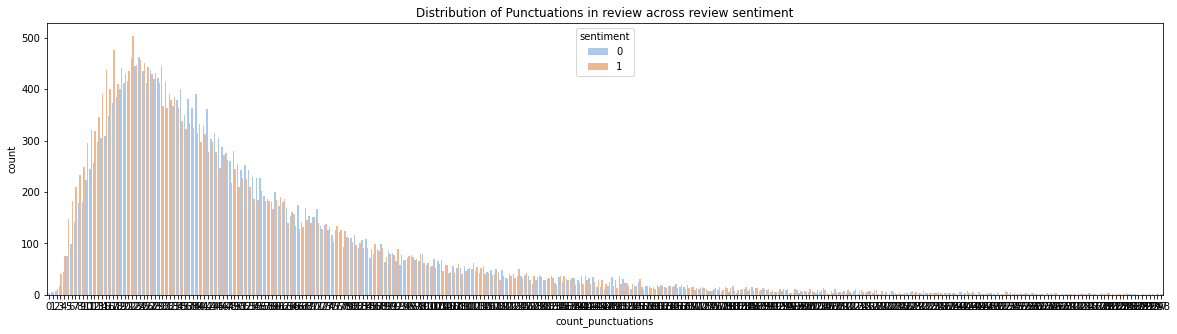

In [ ]:
plt.figure(figsize=(20, 5))
data1=df[df.count_punctuations<300]
ax = sns.countplot(x="count_punctuations",  hue='sentiment', data=data1, palette="pastel")
plt.title("Distribution of Punctuations in review across review sentiment")
plt.show()

Understanding Sentiment across Stopwords count

This graph don't highlight any specific feature across classes.

Text(0.5, 1.0, 'Distribution of Stopwords in review across review sentiment')

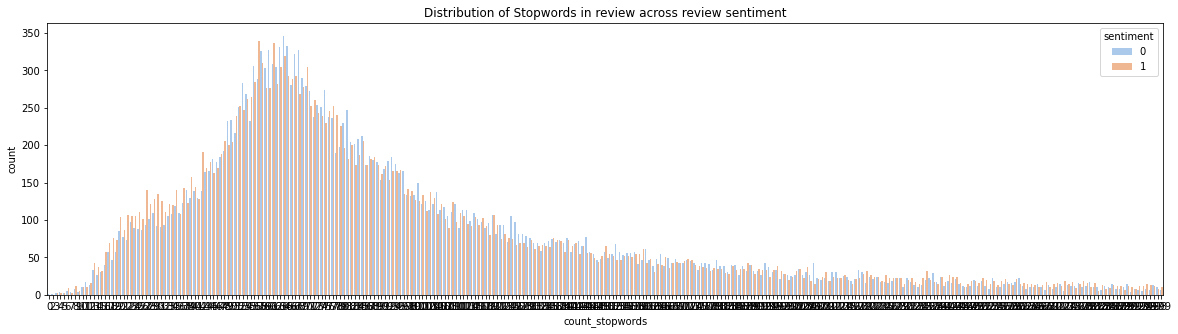

In [ ]:
plt.figure(figsize=(20, 5))
data1=df[df.count_stopwords<300]
ax = sns.countplot(x="count_stopwords",  hue='sentiment', data=data1, palette="pastel")
plt.title("Distribution of Stopwords in review across review sentiment")

In [ ]:
df.groupby(['sentiment'],as_index=False).mean()

,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,0,1.0,229.46456,152.2662,1294.06436,53.59836,5.14632,24.72780,103.38132,4.623461,70.896372,23.447622
1,1,1.0,232.84932,152.0156,1324.79768,51.55876,4.56928,27.96804,104.31900,4.657892,70.164729,22.077985


This shows mean value of each indirect feature is almost similar for both the sentiments. No starling differences were observed for any feature. This also indicate that model comprising these indirect features as explanatory variable will not yield good accuracy score. So to get good classification model, we have to develop machine learning or neural network model based on word vectorizer only.

In [ ]:
# Removing all punctuations from Text
mapping = { "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [ ]:
PUNCT_TO_REMOVE = string.punctuation

Remove all the punctuation

In [ ]:
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Remove the shortened form of the word

In [ ]:
# remove the shortened form of the word
def clean_contractions(text, mapping): 
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

Remove StopWords

In [ ]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

Replace HTML tags

In [ ]:
def word_replace(text):
    return text.replace('<br />','')

Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

Lemma

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

Remove URL

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

Remove HTML

In [ ]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

Text preprocessing

In [ ]:
def preprocess(text):
    text=clean_contractions(text,mapping)
    text=text.lower()
    text=word_replace(text)
    text=remove_urls(text)
    text=remove_html(text)
    text=remove_stopwords(text)
    text=remove_punctuation(text)
#     text=stem_words(text) ## Takes too much of time
    text=lemmatize_words(text)
    return text

In [ ]:
df["review_preprocessed"] = df.review.apply(lambda text : preprocess(text))

In [ ]:
from wordcloud import WordCloud,STOPWORDS

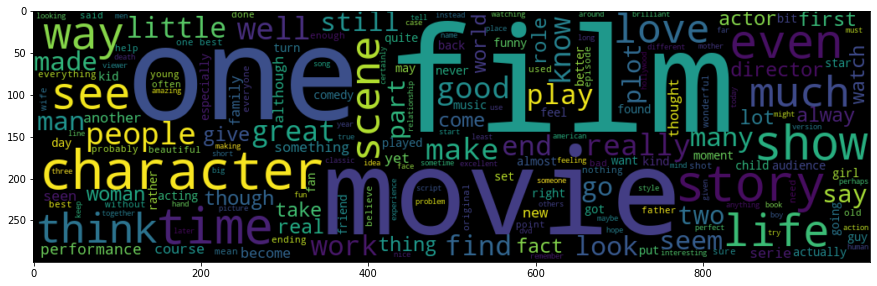

In [ ]:
# Positive Reviews.
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 200, width = 1000, height= 300, stopwords = STOPWORDS).generate(" ".join(df[df.sentiment == 1].review_preprocessed))
plt.imshow(wc , interpolation = 'bilinear')

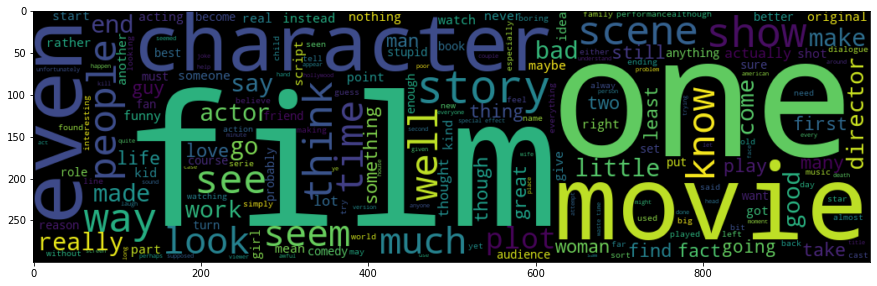

In [ ]:
# Negative Reviews.
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 200, width = 1000, height= 300, stopwords = STOPWORDS).generate(" ".join(df[df.sentiment == 0].review_preprocessed))
plt.imshow(wc , interpolation = 'bilinear') 

In [ ]:
def metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

In [ ]:
X=df[['count_sent', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len',
       'word_unique_percent', 'punct_percent']]
y=df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
[i.shape for i in [X_train, X_test, y_train, y_test] ]

[(40000, 11), (10000, 11), (40000,), (10000,)]

# **Model Implementation**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review_preprocessed'], df['sentiment'], test_size=0.2,random_state=0)

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3),
    max_features=10000
)

word_vectorizer.fit(df['review_preprocessed'])

tfidf_train = word_vectorizer.transform(X_train)
tfidf_test = word_vectorizer.transform(X_test)

In [ ]:
cv=CountVectorizer(analyzer = 'word', token_pattern = r'\w{1,}',ngram_range=(1,3),max_features=10000)
cv.fit(df['review_preprocessed'])
cv_train=cv.transform(X_train)
cv_test=cv.transform(X_test)

# **Logistic Regression**

Logistic Regression with TF-IDF

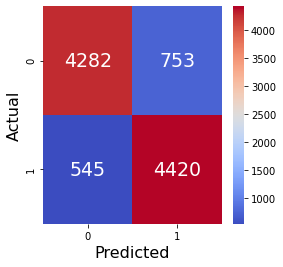


Accuracy:  0.87

F1 Score:  0.87

Report:               precision    recall  f1-score   support

           0       0.89      0.85      0.87      5035
           1       0.85      0.89      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
classifier = LogisticRegression(C=0.1)
classifier.fit(tfidf_train, y_train)
metrics(classifier,tfidf_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


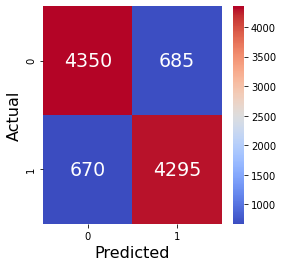


Accuracy:  0.86

F1 Score:  0.86

Report:               precision    recall  f1-score   support

           0       0.87      0.86      0.87      5035
           1       0.86      0.87      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
# Logistic Regression with Count Vectoriser
classifier1 = LogisticRegression(penalty='l2',C=10)
classifier1.fit(cv_train, y_train)

metrics(classifier1,cv_test,y_test)

# **Naive Bayes**

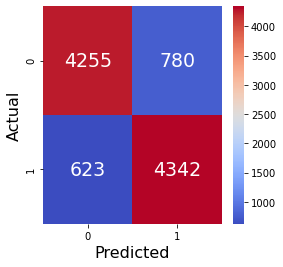


Accuracy:  0.86

F1 Score:  0.86

Report:               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5035
           1       0.85      0.87      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
#Naive Bayes with tf_idf
model= MultinomialNB()
model.fit(tfidf_train, y_train)
metrics(model,tfidf_test,y_test)

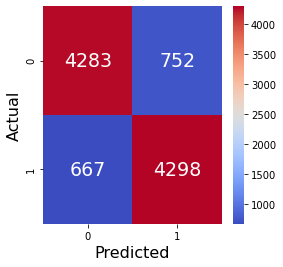


Accuracy:  0.86

F1 Score:  0.86

Report:               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5035
           1       0.85      0.87      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
#Naive Bayes with Count Vectorizer
modela= MultinomialNB()

modela.fit(cv_train, y_train)
metrics(modela,cv_test,y_test)

# **XGBoost**

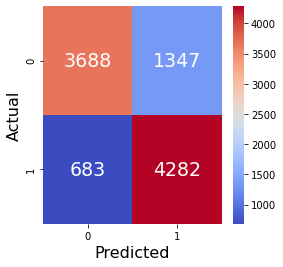


Accuracy:  0.8

F1 Score:  0.81

Report:               precision    recall  f1-score   support

           0       0.84      0.73      0.78      5035
           1       0.76      0.86      0.81      4965

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [ ]:
model = XGBClassifier() #Default XGBoost Model with TF_IDF
model.fit(tfidf_train, y_train)
metrics(model,tfidf_test,y_test)

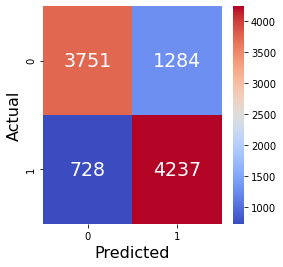


Accuracy:  0.8

F1 Score:  0.81

Report:               precision    recall  f1-score   support

           0       0.84      0.74      0.79      5035
           1       0.77      0.85      0.81      4965

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [ ]:
model_XG_ = XGBClassifier() #Default XGBoost Model with CV
model_XG_.fit(cv_train, y_train)
metrics(model_XG_,cv_test,y_test)

# **SVM**

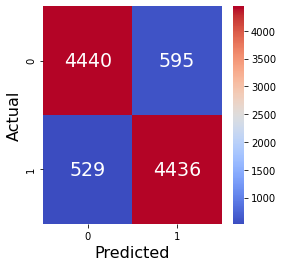


Accuracy:  0.89

F1 Score:  0.89

Report:               precision    recall  f1-score   support

           0       0.89      0.88      0.89      5035
           1       0.88      0.89      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(penalty='l2')
linear_svc.fit(tfidf_train, y_train)
metrics(linear_svc,tfidf_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


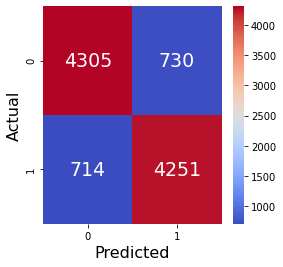


Accuracy:  0.86

F1 Score:  0.85

Report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5035
           1       0.85      0.86      0.85      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
linear_svc1 = LinearSVC(C=0.5, random_state=42)
linear_svc1.fit(cv_train, y_train)
metrics(linear_svc1,cv_test,y_test)

# **Word Embedding with LSTM**

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import Callback, EarlyStopping

In [ ]:
voc_size = 10000

In [ ]:
onehot_repr=[one_hot(words,voc_size) for words in df.review_preprocessed] 

In [ ]:
max_len = max([len(i) for i in onehot_repr])
print(max_len)

1450


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=max_len)

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(df.sentiment)

In [ ]:
X_final.shape,y_final.shape

((50000, 1450), (50000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=2)
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=50, input_length=max_len))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1450, 50)          500000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 560,501
Trainable params: 560,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200)

Epoch 1/10
168/168 [==============================] - 1309s 8s/step - loss: 0.4380 - accuracy: 0.7906 - val_loss: 0.3079 - val_accuracy: 0.8704
Epoch 2/10
168/168 [==============================] - 1293s 8s/step - loss: 0.2604 - accuracy: 0.8977 - val_loss: 0.3538 - val_accuracy: 0.8453
Epoch 3/10
168/168 [==============================] - 1299s 8s/step - loss: 0.2183 - accuracy: 0.9158 - val_loss: 0.3290 - val_accuracy: 0.8690
Epoch 4/10
168/168 [==============================] - 1297s 8s/step - loss: 0.1839 - accuracy: 0.9305 - val_loss: 0.3410 - val_accuracy: 0.8562
Epoch 5/10
168/168 [==============================] - 1296s 8s/step - loss: 0.1641 - accuracy: 0.9377 - val_loss: 0.3872 - val_accuracy: 0.8615
Epoch 6/10
168/168 [==============================] - 1293s 8s/step - loss: 0.1390 - accuracy: 0.9485 - val_loss: 0.4542 - val_accuracy: 0.8572
Epoch 7/10
168/168 [==============================] - 1290s 8s/step - loss: 0.1167 - accuracy: 0.9582 - val_loss: 0.4469 - val_accuracy:

In [ ]:
model.save("/content/drive/MyDrive/NLP - LSTM- SPAM/imdb/LSTM.h5") 

In [ ]:
y_pred=model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

BI-Directional LSTM

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,50,input_length=sent_length))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.2)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200)
y_pred=model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
plot_history(model.history)